In [1]:
!which python

/home/wangling/miniconda3/envs/p4ds-env/bin/python


# Final project: Phân tích dữ liệu Data Engineer Jobs
Các thành viên:

1. Phạm Thị Hoài Hiền - 18120178

2. Vương Thị Ngọc Linh - 18120195

In [2]:
import numpy as np 
import matplotlib as plt
import pandas as pd
import re

## Giới thiệu về dữ liệu

Đây là bộ dữ liệu về việc làm Data Engineer và một số vị trí liên quan, link Kaggle lấy dữ liệu: https://www.kaggle.com/andrewmvd/data-engineer-jobs

Datatset này được tạo bởi Picklesueat và nó chứa hơn 2500 công việc liên quan vị trí Data Engineer.

Dataset gồm có 15 cột:
- Job Tile: Tên vị trí
- Salary Estimate: Mức lương
- Job Description: Miêu tả vị trí
- Rating: Xếp hạng công ty tuyển dụng
- Company name: Tên công ty tuyển dụng
- Location: Địa chỉ nơi làm việc
- Headquarters: Trụ sở của công ty
- Size: Quy mô nhân lực của công ty
- Founded: Năm thành lập công ty
- Type of ownership: Quyền sở hữu
- Industry: Lĩnh vực hoạt động của công ty
- Sector: Lĩnh vực chuyên ngành mà công ty phát triển.
- Revenue: Doanh thu mỗi năm của công ty.
- Competitors: Đối thủ cạnh tranh của công ty.
- Easy Apply: Vị trí này có dễ apply không.


## Tiền xử lí

### Đọc dữ liệu vào dataframe

In [3]:
data_engineer_jobs = pd.read_csv("DataEngineer.csv")
data_engineer_jobs.shape

(2528, 15)

Dataset có 2528 dòng và 15 cột, đúng như miêu tả.

In [4]:
data_engineer_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


### Xử lí các cột numeric

In [5]:
data_engineer_jobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

Có đầy đủ các cột và nó có tên đúng như mô tả. Tiếp theo ta sẽ xem kiểu dữ liệu của cột.

In [6]:
data_engineer_jobs.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

Theo lí thuyết ta sẽ phải có những cột này là kiểu numeric: `Salary Estimate`, `Rating`, `Founded`, `Size`, `Revenue`. Tuy nhiên theo kết quả trên thì các cột `Salary Estimate`, `Size` và `Revenue` chưa có đúng kiểu dữ liệu (object thay vì int hoặc float). Ta tiến hành đổi kiểu dữ liệu lại cho 3 cột này.

**Đổi kiểu dữ liệu cột `Salary Estimate`**

In [7]:
data_engineer_jobs["Salary Estimate"].unique()

array(['$80K-$150K (Glassdoor est.)', '$73K-$94K (Glassdoor est.)',
       '$85K-$154K (Glassdoor est.)', '$84K-$113K (Glassdoor est.)',
       '$57K-$75K (Glassdoor est.)', '$105K-$121K (Glassdoor est.)',
       '$92K-$117K (Glassdoor est.)', '$88K-$136K (Glassdoor est.)',
       '$95K-$167K (Glassdoor est.)', '$79K-$146K (Glassdoor est.)',
       '$93K-$106K (Glassdoor est.)', '$115K-$201K (Glassdoor est.)',
       '$94K-$164K (Glassdoor est.)', '$49K-$98K (Glassdoor est.)',
       '$56K-$108K (Glassdoor est.)', '$85K-$158K (Glassdoor est.)',
       '$133K-$210K (Glassdoor est.)', '$95K-$99K (Glassdoor est.)',
       '$67K-$72K (Glassdoor est.)', '$53K-$100K (Glassdoor est.)',
       '$81K-$100K (Glassdoor est.)', '$94K-$107K (Glassdoor est.)',
       '$43K-$84K (Glassdoor est.)', '$62K-$92K (Glassdoor est.)',
       '$55K-$106K (Glassdoor est.)', '$69K-$103K (Glassdoor est.)',
       '$54K-$113K (Glassdoor est.)', '$74K-$123K (Glassdoor est.)',
       '$69K-$122K (Glassdoor est.)', 

Tất cả các giá trị đều được biểu diễn trong một khoảng cố định. `Glassdoor est.` là mức lương ước tính trên trang việc làm trực tuyến `Glassdoor`. 
Ta đổi giá trị của cột `Salary Estimate` từ mức lương min-max thành mức lương trung bình để dễ dàng so sánh và tính toán.
Rất may là cột này không có giá trị thiếu.

In [8]:
def find_mean_salary(x):
    S = [int(s) for s in re.findall(r'\d+', x)] #liệt kê (list) tất cả số nguyên trong x
    return (S[0] + S[1]) / 2

data_engineer_jobs["Salary Estimate"] = data_engineer_jobs["Salary Estimate"].apply(find_mean_salary)
data_engineer_jobs = data_engineer_jobs.rename(columns={"Salary Estimate": "Salary est. (thousand USD)"})

**Đổi kiểu dữ liệu cột `Size`**

In [9]:
data_engineer_jobs['Size'].unique()

array(['1 to 50 employees', '51 to 200 employees',
       '501 to 1000 employees', '201 to 500 employees',
       '1001 to 5000 employees', '10000+ employees',
       '5001 to 10000 employees', 'Unknown', '-1'], dtype=object)

Ta thấy chỉ có 7 giá trị phân biệt và 2 giá trị missing (unknown, -1). 
Vậy ta quy đổi thành các giá trị từ 1-7 thể hiện cho quy mô tăng dần như sau:
- Mức độ 1: 1 to 50 employees
- Mức độ 2: 51 to 200 employees
- Mức độ 3: 201 to 500 employees
- Mức độ 4: 501 to 1000 employees
- Mức độ 5: 1001 to 5000 employees
- Mức độ 6: 5001 to 10000 employees
- Mức độ 7: 10000+ employees
Các giá trị -1 và unknown ta sẽ để bằng 0.

In [10]:
def transform_size(x):
    if x == '1 to 50 employees':
        return 1
    elif x == '51 to 200 employees':
        return 2
    elif x == '201 to 500 employees':
        return 2
    elif x == '501 to 1000 employees':
        return 4
    elif x == '1001 to 5000 employees':
        return 5
    elif x == '5001 to 10000 employees':
        return 6
    elif x == '10000+ employees':
        return 7
    else:
        return -1

data_engineer_jobs['Size'] = data_engineer_jobs['Size'].apply(transform_size)

**Đổi kiểu dữ liệu cột `Revenue`**

In [11]:
data_engineer_jobs['Revenue'].unique()

array(['$10 to $25 million (USD)', '$25 to $50 million (USD)',
       '$5 to $10 million (USD)', 'Unknown / Non-Applicable',
       '$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       '$500 million to $1 billion (USD)', '$50 to $100 million (USD)',
       '$10+ billion (USD)', '$1 to $2 billion (USD)',
       '$1 to $5 million (USD)', 'Less than $1 million (USD)',
       '$5 to $10 billion (USD)', '-1'], dtype=object)

Ta thấy có rất nhiều cách biểu diễn khác nhau cho cột này (có khoảng from..to, có con số X+, có less than). 
Do số tiền chỉ có đơn vị là triệu (million) và tỷ (billion) nên ta sẽ đổi hết giá trị về thành đơn vị tỉ đô
Đổi giá trị cột `Revenue` từ các khoảng doanh thu bằng `giá trị cao nhất (max)` trong khoảng:
- Các dòng có giá trị X+ sẽ được quy ước là X+1
- Các dòng có giá trị Less than X quy ước là X 
- Missing value sẽ được quy ước là 0

In [12]:
def find_max_revenue(x):
    if x == 'Unknown / Non-Applicable' or x == '-1':
        return -1
    else:
        S = [int(s) for s in re.findall(r'\d+', x)]
        if 'billion' in x and 'million' not in x:
            S = [s*1000 for s in S]
        if '+' in x:
            S.append(S[0] + 1)
        if 'Less than' in x:
            S.append(S[0])
            S[0] = 0
        return S[1]
data_engineer_jobs['Revenue'] = data_engineer_jobs['Revenue'].apply(find_max_revenue)
data_engineer_jobs = data_engineer_jobs.rename(columns={'Revenue': 'Revenue (million USD)'})

In [13]:
data_engineer_jobs

,Job Title,Salary est. (thousand USD),Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue (million USD),Competitors,Easy Apply
0,Data Engineer,115.0,Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1,2009,Company - Private,Consulting,Business Services,25,"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,115.0,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",2,1998,Company - Private,IT Services,Information Technology,50,-1,-1
2,Data Engineers,115.0,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",2,2003,Company - Private,IT Services,Information Technology,10,-1,-1
3,Client Trade Support Engineer,115.0,About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",4,2000,Company - Private,Investment Banking & Asset Management,Finance,-1,-1,-1
4,Data Engineer,115.0,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",2,1914,Company - Private,Insurance Carriers,Insurance,500,"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,102.0,The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1,-1,Company - Private,Computer Hardware & Software,Information Technology,5,-1,-1
2524,Electrical Engineer,102.0,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",2,1993,Company - Private,Staffing & Outsourcing,Business Services,10,-1,-1
2525,Sr. Big Data Engineer,102.0,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",4,-1,Company - Private,IT Services,Information Technology,500,-1,-1
2526,Senior Big Data / ETL Engineer,102.0,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",-1,-1,Company - Public,-1,-1,-1,-1,-1


### Xử lí các cột category

Ở cột `Company Name`, ta thấy có phần "\n rating" phía sau tên công ty là dư thừa (vì đã có cột `rating` riêng), vì vậy ta xoá nó đi.

In [14]:
data_engineer_jobs['Company Name'] = data_engineer_jobs['Company Name'].str.partition("\n")

### Xử lí missing value

In [15]:
data_engineer_jobs.isnull().sum() / len(data_engineer_jobs) * 100

Job Title                     0.0
Salary est. (thousand USD)    0.0
Job Description               0.0
Rating                        0.0
Company Name                  0.0
Location                      0.0
Headquarters                  0.0
Size                          0.0
Founded                       0.0
Type of ownership             0.0
Industry                      0.0
Sector                        0.0
Revenue (million USD)         0.0
Competitors                   0.0
Easy Apply                    0.0
dtype: float64

Tỉ lệ missing value của tưng cột là 0.0, tuy nhiên sau khi xem dữ liệu, có thể thấy tác giả đã thay các giá trị thiếu thành `-1` và `Unknown / Non-Applicable`.
Phần `Unknown / Non-Applicable` ta đã xử lí ở cột `Revenue` rồi nên bây giờ chỉ xem xét tới giá trị -1 ở các cột.

In [16]:
def find_missing_value(col):
    if col.dtypes == np.dtype('int64') or col.dtypes == np.dtype('float64'):
        return abs(col[col == -1].sum() / len(col) * 100)
    else:
        return len(col[col == '-1']) / len(col) * 100
missing_ratio = data_engineer_jobs.apply(find_missing_value)
missing_ratio

Job Title                      0.000000
Salary est. (thousand USD)     0.000000
Job Description                0.000000
Rating                         9.256329
Company Name                   0.000000
Location                       0.000000
Headquarters                   4.905063
Size                           7.199367
Founded                       22.587025
Type of ownership              4.707278
Industry                      14.952532
Sector                        14.833861
Revenue (million USD)         32.950949
Competitors                   69.185127
Easy Apply                    94.224684
dtype: float64

Cột Competitors và Easy Apply có rất nhiều missing value, và dữ liệu hai cột này cũng không cần thiết cho câu hỏi, vì vậy sẽ xóa hai cột này để làm sạch dữ liệu.

In [17]:
data_engineer_jobs = data_engineer_jobs.drop(columns=['Competitors', 'Easy Apply'])

Đối với các cột có tỉ lệ missing cao (`Industry`, `Sector`, `Revenue`, `Founded`), ta sẽ xử lí nó theo từng câu hỏi đặt ra ở phần sau.

In [18]:
company = data_engineer_jobs[data_engineer_jobs['Revenue (million USD)'] == -1]
company = company.groupby(['Company Name']).size()
company[company > 1]

Company Name
ARC Group                2
AbleForce, Inc.          2
Aerotek                  2
Affinity Solutions       3
Akuna Capital            2
                        ..
foresee medical, inc.    2
iSphere                  2
ingenium.agency          2
pddninc.net              3
sensemetrics             2
Length: 145, dtype: int64

In [19]:
tmp = data_engineer_jobs[data_engineer_jobs['Company Name'] == 'Akuna Capital'] 
tmp[['Location','Revenue (million USD)']]

,Location,Revenue (million USD)
417,"Chicago, IL",-1
464,"Chicago, IL",-1


### Xử lý cột Job Title

Ở đây ta quan tâm đến 2 job là Data Engineer và Senior Data Engineer, và có rất nhiều job thuộc 2 loại này nhưng có title khác nhau, ví dụ: Big Data Engineer, Data Engineer II,... Vì vậy cần đồng bộ các title này trở về 2 loại chính. Đầu tiên là sửa lại title chứa Sr. thành Senior để dễ xử lý.

In [20]:
data_engineer_jobs['Job Title'] = data_engineer_jobs['Job Title'].str.replace('Sr.','Senior', regex=True)

Tiếp theo ta thay đổi tất cả title chứa cụm 'Data Engineer' -> Data Engineer và tương tự với Senior Data Engineer và lưu lại vào cột Job Title.

In [21]:
title = []
job_title = data_engineer_jobs['Job Title'].values
for each in job_title:
    if 'Senior Data Engineer' not in each:
        #lệnh re replace các title Data Engineer
        x = re.sub("[\w\s\S]*Data[\w\s\S]*Engineer[\w\s\S]*",'Data Engineer',each,flags=re.IGNORECASE) 
    else:
        #lệnh re thay đổi các title Senior Data Engineer
        x = re.sub("[\w\s\S]*Senior[\w\s\S]*Data[\w\s\S]*Engineer[\w\s\S]*",'Senior Data Engineer', each,flags=re.IGNORECASE)
    title.append(x)

In [22]:
data_engineer_jobs['Job Title']= title
data_engineer_jobs['Job Title'].value_counts()

Data Engineer                             1275
Senior Data Engineer                       160
Software Engineer                           93
Machine Learning Engineer                   17
Systems Engineer                            13
                                          ... 
Senior Backend Engineer - Chicago            1
MTS Software Engineer, Data Infra.           1
Engineering Manager - Data OS Platform       1
Senior Big Data/AI                           1
Senior Project Engineer                      1
Name: Job Title, Length: 759, dtype: int64

## Các câu hỏi cần trả lời

### 1 - Mức lương trung bình của từng job là bao nhiêu? Mức lương cho Senior data là bao nhiêu?

In [24]:
#CODE HERE
temp = data_engineer_jobs[["Job Title","Salary est. (thousand USD)"]].groupby(["Job Title"]).sum().sort_values(by=['Salary est. (thousand USD)'], ascending=False)
temp["Salary est. (thousand USD)"] = temp["Salary est. (thousand USD)"] / data_engineer_jobs["Job Title"].value_counts()
temp

,Salary est. (thousand USD)
Job Title,
Data Engineer,104.540784
Senior Data Engineer,106.593750
Software Engineer,107.553763
Machine Learning Engineer,95.235294
Systems Engineer,94.423077
...,...
Principal Systems Engineer,38.500000
Equipment Engineer,38.500000
Engineer Quality Control Inspector with Security Clearance,38.500000


<AxesSubplot:xlabel='Job Title'>

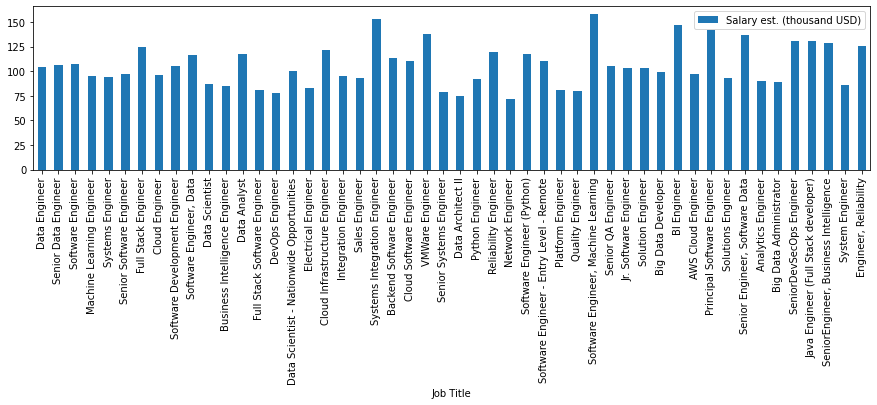

In [25]:
temp.head(50).plot.bar(figsize=(15,3))

Vì có đến hơn 700 job khác nhau nên chỉ show mức lương trung bình của top 50 job đầu (cũng là 50 job được tuyển nhiều nhất).

In [26]:
temp[temp.index == "Senior Data Engineer"].values

array([[106.59375]])

Như vậy, Senior Data Engineer có mức lương trung bình là 106 triệu USD.

### 2 - Top 5 lĩnh vực tuyển dụng data engineer (tất cả các vị trí) nhiều nhất?**

<AxesSubplot:>

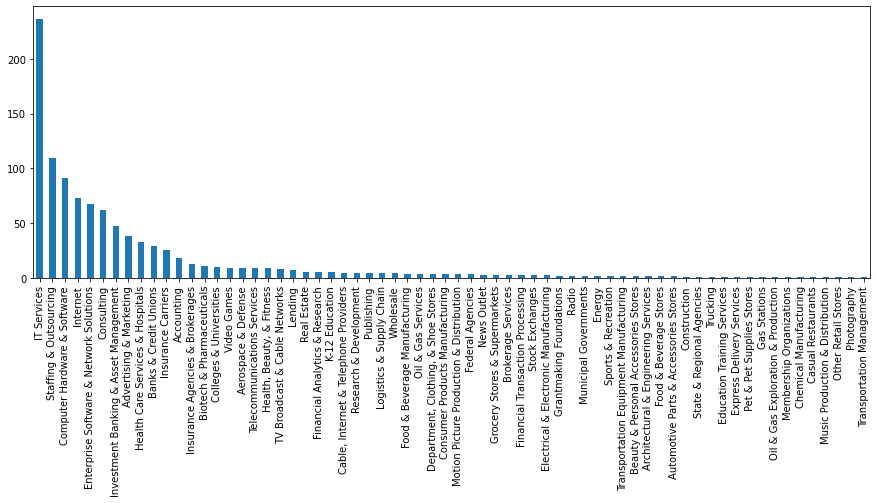

In [27]:
industry = data_engineer_jobs[data_engineer_jobs['Job Title'] == "Data Engineer"]["Industry"].value_counts()
industry.drop(labels=['-1']).plot.bar(figsize=(15,5))


**5 lĩnh vực tuyển dụng data engineer nhiều nhất là:**


In [29]:
industry.drop(labels=['-1']).head(5)

IT Services                                236
Staffing & Outsourcing                     110
Computer Hardware & Software                91
Internet                                    73
Enterprise Software & Network Solutions     68
Name: Industry, dtype: int64

### 3 - Top 10 location tuyển dụng nhiều vị trí nhất?

In [ ]:
#CODE HERE

### 4 - Lĩnh vực nào có mức lương trung bình (trên tất cả job) cao nhất và thấp nhất?

In [ ]:
#CODE HERE